In [1]:
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sdcdup.utils import get_project_root
from sdcdup.visualization import get_ticks

%load_ext dotenv
%dotenv

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE = 20
plt.rc('font', size=BIGGEST_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

project_root = get_project_root()
train_image_dir = os.path.join(project_root, os.getenv('RAW_DATA_DIR'), 'train_768')

In [3]:
# high pixel difference but still duplicate (high entropy)
# src1 = "03a5fd8d2.jpg"
# src2 = "676f4cfd0.jpg"

# src1 = "50fcf9188.jpg"
# src2 = "8ff2e334e.jpg"

# moderate pixel difference but still duplicate (medium entropy)
src1 = "00021ddc3.jpg"
src2 = "7ca331f03.jpg"

# highly different non-duplicates with lots of clouds. (low entropy)
# src1 = "1636d25de.jpg"
# src2 = "7947a9a56.jpg"

ibgr1 = cv2.imread(os.path.join(train_image_dir, src1))
ibgr2 = cv2.imread(os.path.join(train_image_dir, src2))

irgb1 = cv2.cvtColor(ibgr1, cv2.COLOR_BGR2RGB)
irgb2 = cv2.cvtColor(ibgr2, cv2.COLOR_BGR2RGB)

In [4]:
dtick = 256
n_ticks = 768 // dtick + 1
ticks768 = [i * dtick for i in range(n_ticks)]

In [5]:
hist_size = 256

dtick = 64
n_ticks = 256 // dtick + 1
ticks256 = [i * dtick * hist_size // 256 for i in range(n_ticks)]

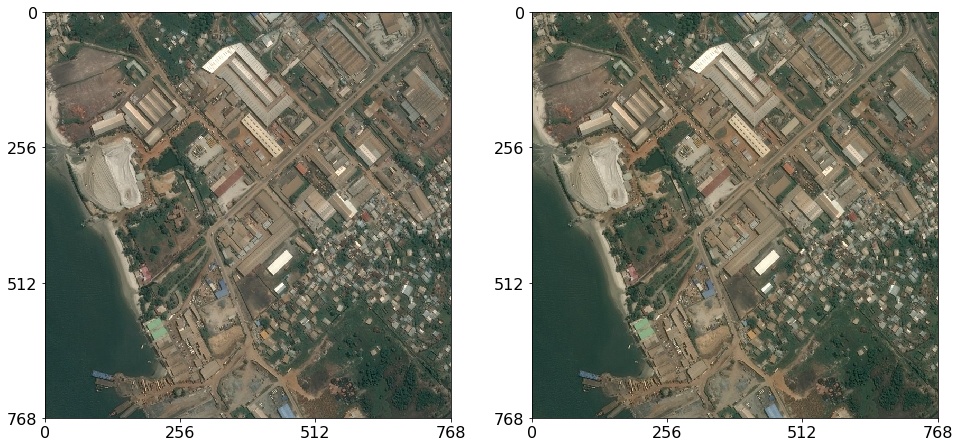

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
ax1.imshow(irgb1, interpolation = 'nearest')
ax1.set_xticks(ticks768)
ax1.set_yticks(ticks768)
ax2.imshow(irgb2, interpolation = 'nearest')
ax2.set_xticks(ticks768)
ax2.set_yticks(ticks768)
plt.show()

In [8]:
hist1r = cv2.calcHist([irgb1], [0], None, [hist_size], [0, 256])
hist1g = cv2.calcHist([irgb1], [1], None, [hist_size], [0, 256])
hist1b = cv2.calcHist([irgb1], [2], None, [hist_size], [0, 256])
hist2r = cv2.calcHist([irgb2], [0], None, [hist_size], [0, 256])
hist2g = cv2.calcHist([irgb2], [1], None, [hist_size], [0, 256])
hist2b = cv2.calcHist([irgb2], [2], None, [hist_size], [0, 256])
hist12r = cv2.calcHist([irgb1[0], irgb2[0]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist12g = cv2.calcHist([irgb1[1], irgb2[1]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist12b = cv2.calcHist([irgb1[2], irgb2[2]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist1rgb = cv2.calcHist([irgb1], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256])
hist2rgb = cv2.calcHist([irgb2], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256])

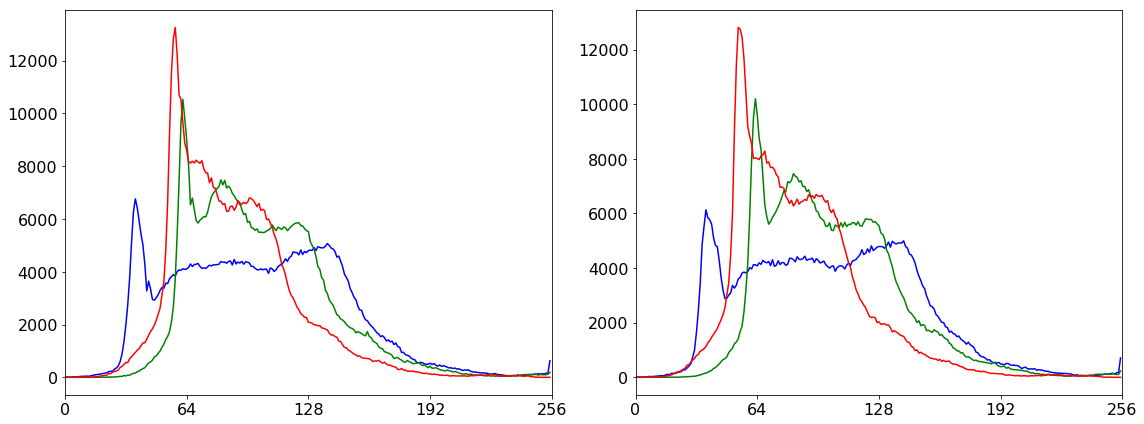

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
color = ('b','g','r')
for i, col in enumerate(color):
    hist1 = cv2.calcHist([irgb1], [i], None, [hist_size], [0, 256])
    hist2 = cv2.calcHist([irgb2], [i], None, [hist_size], [0, 256])
    ax1.plot(hist1, color = col)
    ax1.set_xlim([0, hist_size])
    ax1.set_xticks(ticks256)
    ax2.plot(hist2, color = col)
    ax2.set_xlim([0, hist_size])
    ax2.set_xticks(ticks256)
plt.tight_layout()

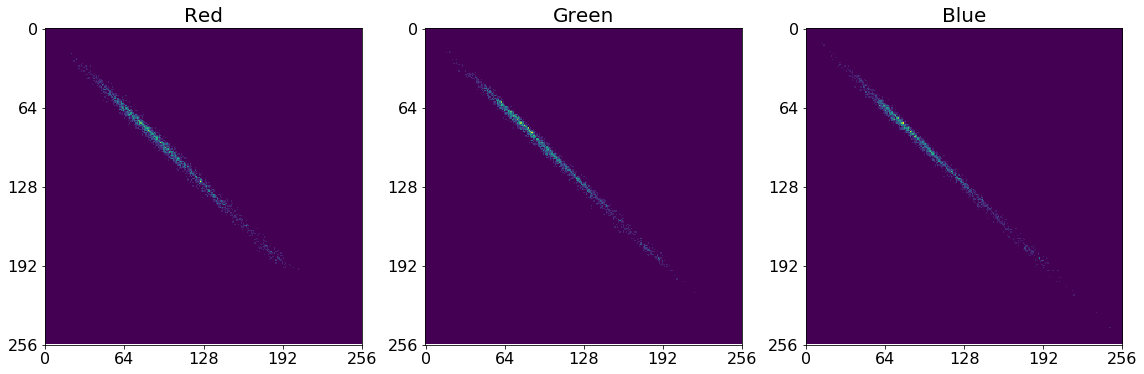

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 6))
ax1.imshow(hist12r, interpolation = 'nearest')
ax1.set_title('Red')
ax1.set_xticks(ticks256)
ax1.set_yticks(ticks256)
ax2.imshow(hist12g, interpolation = 'nearest')
ax2.set_title('Green')
ax2.set_xticks(ticks256)
ax2.set_yticks(ticks256)
ax3.imshow(hist12b, interpolation = 'nearest')
ax3.set_title('Blue')
ax3.set_xticks(ticks256)
ax3.set_yticks(ticks256)
plt.tight_layout()
plt.show()

In [ ]:
print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_HELLINGER))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_CHISQR_ALT))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_INTERSECT))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_KL_DIV))

In [ ]:
"03a5fd8d2.jpg" vs "676f4cfd0.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.5101613176176912,0.13311772635687172,0.17901047380929752,0.1675464940024875
    128,       0.496118478247966, 0.1328757521815579, 0.17886339942387053,0.1673809583574397
     64,       0.4316713614412065,0.1326923693480445, 0.17862500491883446,0.16718985751407883
     32,       0.3465050714913721,0.13226786554292289,0.17806635571851823,0.16660166447688993

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       947218.127977416, 80980.61402209185,144882.01838110096,127304.40196772343
    128,       915355.822142716, 80750.27150209267,144701.3907563206, 127110.84848661942
     64,       727124.4057309293,80559.29558113641,144355.41953295274,126864.91520774094
     32,       483158.1057538808,80113.5899539676, 143493.67896449205,126031.82119122455

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       254122.0,500916.0,469717.0,477788.0
    128,       258566.0,501128.0,469786.0,477799.0
     64,       305869.0,501137.0,469800.0,477799.0
     32,       373006.0,501164.0,469800.0,479099.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       1104231.2446607982, 48923.80576869719,78815.28969744346,69333.3702006328
    128,        903331.8697237927, 47882.15005776592,78666.3938462355, 69146.64759504885
     64,        533667.1018799265, 46963.13961652001,78457.55716844826,68972.05737662611
     32,        317564.30749812844,43928.80490360679,77983.17613419474,68290.78437813898

In [ ]:
"00021ddc3.jpg" vs "7ca331f03.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.5073876429262368 ,0.02064160967797357 ,0.0239282451779752  ,0.07565757251450936
    128,       0.4774321992699387 ,0.01815070456445946 ,0.021525125181221565,0.07409099404111166
     64,       0.37981383950876507,0.015759044259807408,0.019049105373379865,0.07035788800513225
     32,       0.2778190530437986 ,0.014990703026677703,0.016807251395283655,0.06974489693924078

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       861727.7257452664 ,2003.2367145685826,2676.2736751269604,26268.685090956318
    128,       789189.6116183588 ,1551.5414374503575,2165.86881792326  ,25236.221031785433
     64,       557812.8520237854 ,1170.8274658886253,1707.2332775968973,22938.897488312683
     32,       320221.74202075956,1059.7265558718525,1329.9638193569083,22559.05542394988

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       280881.0,579617.0,577773.0,552543.0
    128,       296801.0,580878.0,579355.0,554046.0
     64,       346210.0,581268.0,579687.0,554105.0
     32,       415215.0,581817.0,580542.0,554132.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       1752814.129854564 ,988.4325633298325,1508.6592610661326,12431.87886426292
    128,       1279376.9040245938,769.9381631446793,1256.3751694428615,11930.413511908295
     64,       528268.6214762959 ,584.9992374177738,883.1931212537613 ,10854.905063728225
     32,       205737.1893425753 ,529.2396843566863,693.6483243763354 ,10673.181198485305

In [ ]:
"1636d25de.jpg" vs "7947a9a56.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.1378165816428044 ,0.10865355622366842,0.1080404179815353 ,0.10517334313505028
    128,       0.1331967804180492 ,0.1084008825347025 ,0.10764756605738111,0.10398759729252657
     64,       0.11942078826503821,0.10739720519373333,0.10679544851857413,0.1028753605687354
     32,       0.11122728857882103,0.10491989549966503,0.10451278021347767,0.10113911334883546

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       52145.225347797335,32491.136811013264,32050.26684382397 ,29853.975987135065
    128,       49362.15314866481 ,32282.75107129625 ,31709.388134372657,28776.645989059278
     64,       39517.1722813654  ,31405.42274947245 ,30936.30174920531 ,27779.63235426242
     32,       33255.20543883372 ,29198.916838628556,28933.33577010051 ,26380.676085373714

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       574125.0,578249.0,578267.0,578416.0
    128,       574567.0,578278.0,578280.0,578419.0
     64,       576491.0,578295.0,578313.0,578448.0
     32,       577401.0,578338.0,578323.0,578482.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       357252.85402197985,303947.39260760444,304598.969740345  ,295863.5882620861
    128,       350125.8445519493 ,309821.52080090746,311962.7318711431 ,301153.8622496766
     64,       331823.93907400814,313575.1361277952 ,318987.5342109353 ,307885.131338421
     32,       329073.53235940816,314052.26720955706,325126.15735132527,305134.5551587083